# Analysis of results

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import mplcursors

Loading the data and creating new columns:

In [2]:
data = pd.read_pickle("C:/Users/alvar/Desktop/PDB/data/result.pkl")

data['tm-score'] = data['tm-score'].str.replace(',', '.').astype(float)
data['pLDDT_mean'] = data['pLDDT'].apply(lambda arr: np.mean(arr))
data['Difference'] = data['pTM'] - data['tm-score']

No need to run the next bock of code on the next anaylisis, it is included because we introduced a new query regarding the unobserved percentage

In [3]:
index_data = pd.read_csv('C:/Users/alvar/Desktop/PDB/ids.csv')
indices_to_keep = index_data['ID'].tolist()
mask = data.index.isin(indices_to_keep)
data = data[mask]

Split in the 3 kinds of alignment in qs_align

In [4]:
equivalent = data.loc[data['relation'] == 'EQUIVALENT']
partial_incomplete = data.loc[data['relation'] == 'PARTIAL_INCOMPLETE']
partial_complete = data.loc[data['relation'] == 'PARTIAL_COMPLETE']

## Inference vs Sequence length

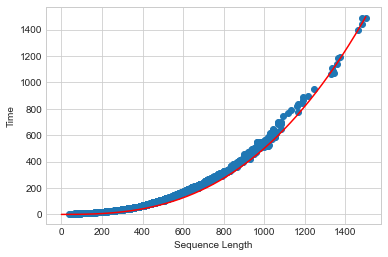

In [13]:
fig, ax = plt.subplots()
ax.scatter(data['seq_length'],data['Inference'])
def f(x):
    return (x/100)**2.70
x = np.linspace(0, 1500, 1000)
y = f(x)
ax.plot(x,y,color='red')
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Time')
plt.show()

## TM-score vs pTM

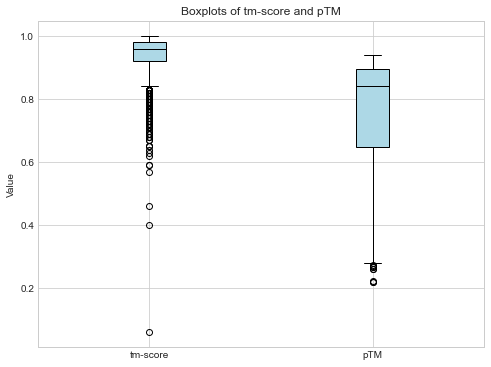

In [5]:
# Set the style
plt.style.use('seaborn-whitegrid')

# Drop rows with missing values in 'tm-score' column
data.dropna(subset=['tm-score'], inplace=True)
data_to_plot = [data['tm-score'], data['pTM']]
fig, ax = plt.subplots(figsize=(8, 6))
boxplot = ax.boxplot(data_to_plot, labels=['tm-score', 'pTM'], patch_artist=True, medianprops={'color': 'black'})
box_colors = ['lightblue', 'lightblue']
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)
ax.set_ylabel('Value')
ax.set_title('Boxplots of tm-score and pTM')
plt.show()

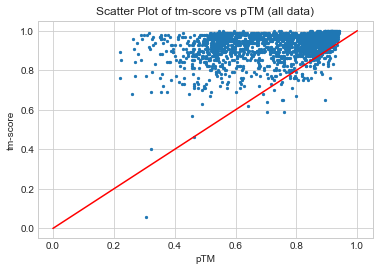

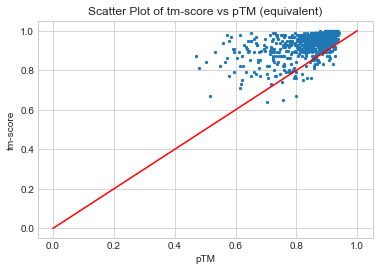

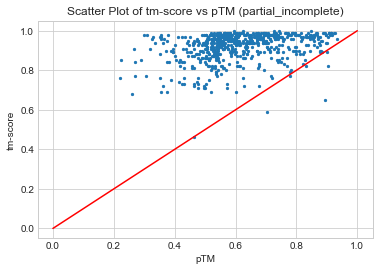

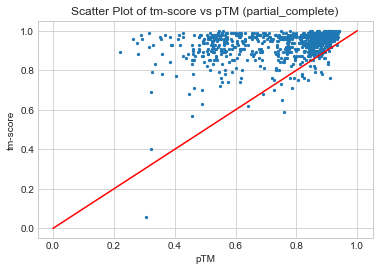

In [7]:
names = ["(all data)", "(equivalent)", "(partial_incomplete)", "(partial_complete)"]
i=0
for df in [data, equivalent, partial_incomplete, partial_complete]:
    fig, ax = plt.subplots()
    scatter = ax.scatter(df['pTM'], df['tm-score'], s=5)
    ax.set_xlabel('pTM')
    ax.set_ylabel('tm-score')
    ax.plot([0, 1], [0, 1], color='red')
    # Set a title for the plot
    ax.set_title(f'Scatter Plot of tm-score vs pTM {names[i]}')
    i += 1
    # Add cursor highlighting and annotation
    cursor = mplcursors.cursor(scatter, hover=True)

    @cursor.connect("add")
    def on_add(sel):
        # Get the index label of the selected point
        index_label = df.index[sel.target.index]
        # Get the x and y values of the selected point
        x = sel.target[0]
        y = sel.target[1]
        # Create the annotation text with the index label
        annotation_text = f"Index: {index_label}"
        # Set the annotation text
        sel.annotation.set_text(annotation_text)

    plt.show()

# TM-score vs symmetry type

997
72
4
13
2
34
3


C:\Users\alvar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


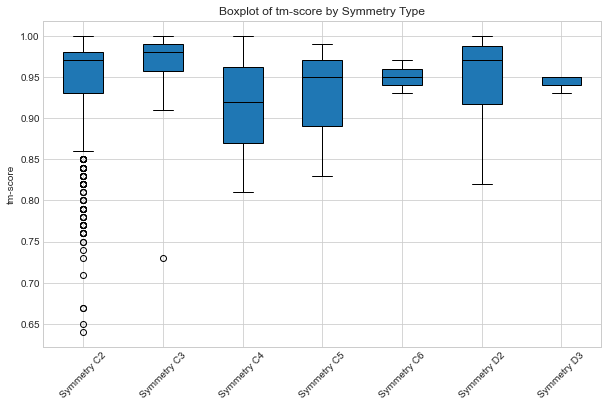

In [10]:
# List of unique symmetry types
symmetry_types = data['symmetry'].unique()

# Create a boxplot for each symmetry type
fig, ax = plt.subplots(figsize=(10, 6))

boxplot_data = []
labels = []

for sym_type in symmetry_types:
    # Filter the data for the current symmetry type
    filtered_data = equivalent[equivalent['symmetry'] == sym_type]['tm-score']
    print(filtered_data.shape[0])
    
    # Add the filtered data to the list for boxplot
    boxplot_data.append(filtered_data)
    
    # Create the label for the symmetry type
    label = f"Symmetry {sym_type}"
    labels.append(label)
    
# Create the boxplot
ax.boxplot(boxplot_data, labels=labels, patch_artist=True, medianprops={'color': 'black'})

# Set the y-axis label
ax.set_ylabel('tm-score')

# Set the title
ax.set_title('Boxplot of tm-score by Symmetry Type')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

Not enough data points for conclusions